In [1]:
import numpy as np
import sewpy
import aplpy
import astropy.units as u
from astropy.coordinates import SkyCoord
import matplotlib.pyplot as plt
import aplpy
from astropy.io import fits

%matplotlib inline

/scratch/home/rwibowo/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: The mpl_toolkits.axes_grid module was deprecated in version 2.1. Use mpl_toolkits.axes_grid1 and mpl_toolkits.axisartist provies the same functionality instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


In [3]:
def runsextractor(image_file, detect_thresh=3.5, analysis_thresh=3.0):
    params = ['NUMBER', 'FLUX_ISO', 'FLUXERR_ISO', 'FLUX_AUTO', 'FLUXERR_AUTO', 'FLUX_BEST', 'FLUXERR_BEST', 'BACKGROUND', 
              'THRESHOLD', 'FLUX_MAX', 'XMAX_IMAGE', 'YMAX_IMAGE', 'XPEAK_IMAGE', 'YPEAK_IMAGE', 'ALPHAPEAK_J2000', 
              'DELTAPEAK_J2000', 'X_IMAGE', 'Y_IMAGE', 'ALPHA_SKY', 'DELTA_SKY', 'ALPHA_J2000', 'DELTA_J2000']

    config = {"DETECT_THRESH":detect_thresh, "ANALYSIS_THRESH":analysis_thresh}

    sew = sewpy.SEW(params=params, config=config)

    out = sew(image_file)
    data = out["table"]
    
    ra, dec, flux, label = data['ALPHA_J2000'], data['DELTA_J2000'], data['FLUX_MAX'], data['NUMBER'].astype('int')
    
    return ra, dec, flux, label

In [4]:
imgfile = "./images/uid___A002_X969646_X1aa8.ms.split.cal-CALIBRATE_BANDPASS-J0501-0159.ms.self3.substracted.cont.image.fits"

In [5]:
ra, dec, flux, label = runsextractor(imgfile, detect_thresh=3.5, analysis_thresh=3.0)

Ouch, SExtractor complains :
b''


In [6]:
#nlabel = []
for i,lbl in enumerate(label):
    print(lbl, ra[i], dec[i], flux[i])
    c = SkyCoord(ra=ra[i], dec=dec[i], unit=(u.deg, u.deg), frame='icrs')
    print(c.ra.hms, c.dec.dms)
    #nlabel.append("CALMA J"+str(c.ra.hms.h))

1 75.3000234 -1.990202 0.0003581623
hms_tuple(h=5.0, m=1.0, s=12.005616000002703) dms_tuple(d=-1.0, m=-59.0, s=-24.727200000000096)
2 75.3035378 -1.9877912 0.0006883366
hms_tuple(h=5.0, m=1.0, s=12.84907200000319) dms_tuple(d=-1.0, m=-59.0, s=-16.048319999999876)


In [8]:
#rms = 1.92070720004e-05
#rms = 1.92046941265e-05
rms = 8.4e-05
#c = SkyCoord('11h39m10.702595s -13d50m43.63856s', unit=(u.hourangle, u.deg), frame='icrs')
c = SkyCoord('05h01m12.8s -01d59m14s', unit=(u.hourangle, u.deg), frame='icrs')

center_x, center_y = [c.ra.value, c.dec.value]

PB = 18./3600.0 



multp = np.array([5, 7])
lvl = rms*multp

In [9]:
hdu_list = fits.open(imgfile)
image_data = hdu_list[0].data
vmax = image_data.max()

INFO: Setting slices=[0, 0] [aplpy.core]


indices in parameterized keywords must not have leading zeroes. [astropy.wcs.wcs]
indices in parameterized keywords must not have leading zeroes. [astropy.wcs.wcs]
indices in parameterized keywords must not have leading zeroes. [astropy.wcs.wcs]
indices in parameterized keywords must not have leading zeroes. [astropy.wcs.wcs]
indices in parameterized keywords must not have leading zeroes. [astropy.wcs.wcs]
indices in parameterized keywords must not have leading zeroes. [astropy.wcs.wcs]
indices in parameterized keywords must not have leading zeroes. [astropy.wcs.wcs]
indices in parameterized keywords must not have leading zeroes. [astropy.wcs.wcs]
indices in parameterized keywords must not have leading zeroes. [astropy.wcs.wcs]
indices in parameterized keywords must not have leading zeroes. [astropy.wcs.wcs]
indices in parameterized keywords must not have leading zeroes. [astropy.wcs.wcs]
indices in parameterized keywords must not have leading zeroes. [astropy.wcs.wcs]
indices in param

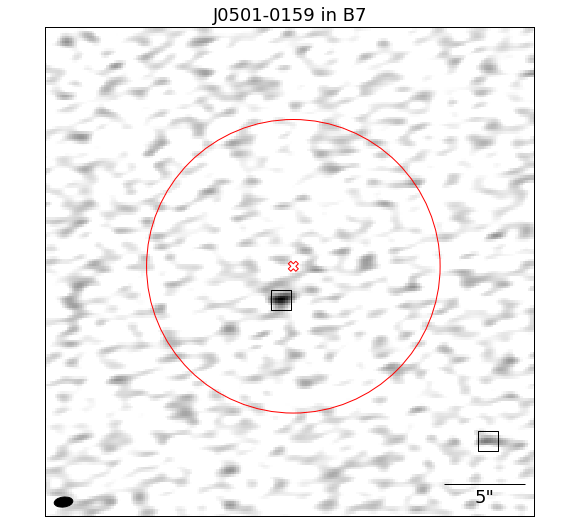

In [10]:
image = aplpy.FITSFigure(imgfile)#, figsize=(10, 10), dpi=300)

#image.show_colorscale(vmin=0, vmax=vmax, cmap="gist_heat")
image.show_grayscale(vmin=0, vmax=vmax, invert=True)
#image.show_colorbar()
image.tick_labels.set_font(size='small')
#image.show_contour()#colors='white', levels=lvl, alpha=0.75)
image.hide_xaxis_label()
image.hide_yaxis_label()
image.hide_tick_labels()

# BEAM
image.add_beam()
image.beam.set_color('black')

# SCALE
image.add_scalebar(5 * u.arcsecond)
image.scalebar.set_label('5"')
image.scalebar.set_color("black")
image.scalebar.set_font_size(18)

# CENTER source (calibrator)
image.show_markers(center_x, center_y, marker='X', edgecolor="red", facecolor="none", s=100)

# PB circle
image.show_circles(center_x, center_y, PB/2.0, edgecolor='red', facecolor="none")


# DETECTED SOURCE
image.show_markers(ra, dec, edgecolor='black', facecolor='none', marker='s', s=400)

# for i, lbl in enumerate(label):
#     image.add_label(ra[i], dec[i]-0.0004, lbl, color='black', size=18)
    


image.set_title("J0501-0159 in B7", size=18)
#image.add_label(0.1, 0.1, "J0501-0159 B7")

In [ ]:
image.savefig("J0501-0159_B7.png", dpi=300, transparent=True)

In [ ]:
help(image.set_title)